In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
charttype=pd.read_csv('/content/drive/MyDrive/charts/charts/train_val.csv')
charttype

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical
...,...,...
995,995,dot_line
996,996,dot_line
997,997,dot_line
998,998,dot_line


In [6]:
charttype.loc[0,"type"]

'vbar_categorical'

In [10]:
from PIL import Image
import os

main_path = '/content/drive/MyDrive/charts/charts/train_val'

chart = []
type=[]
for file in os.listdir(main_path):
  path=os.path.join(main_path,file)
  if path.endswith(('.png')):
      img = Image.open(path)
      img_to_tensor = tf.convert_to_tensor(img)
      chart.append(img_to_tensor)
      index=int(os.path.splitext(file)[0])
      types=charttype.loc[index,"type"]
      type.append(types)

main_path2 = '/content/drive/MyDrive/charts/charts/test'


for file in os.listdir(main_path2):
  path=os.path.join(main_path2,file)
  if path.endswith(('.png')):
      img = Image.open(path)
      img_to_tensor = tf.convert_to_tensor(img)
      chart.append(img_to_tensor)
      index=int(os.path.splitext(file)[0])
      types=charttype.loc[index,"type"]
      type.append(types)
chart=np.array(chart)
type=np.array(type)
chart
type

array(['vbar_categorical', 'vbar_categorical', 'vbar_categorical', ...,
       'vbar_categorical', 'vbar_categorical', 'vbar_categorical'],
      dtype='<U16')

vbar_categorical


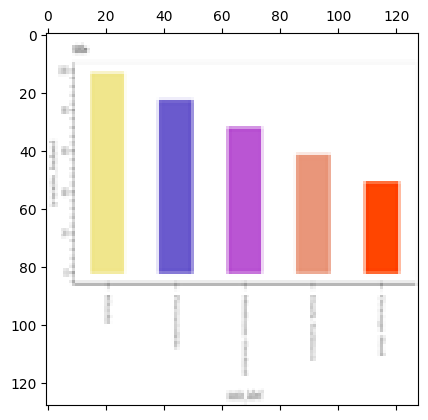

In [15]:
print(type[0])
plt.matshow(chart[0])

In [24]:
chart_types = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
chart_types_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
type_value= np.array([chart_types_map[ctype] for ctype in type])

In [25]:
np.save('x.npy', chart)
np.save('y.npy', type_value)
x = np.load('x.npy')
y = np.load('y.npy') 


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [30]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(210, 128, 128, 4)
(840, 128, 128, 4)
(840,)
(210,)


In [34]:
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,4)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 47.2018 - accuracy: 0.2190 - val_loss: 571.4034 - val_accuracy: 0.1667
Epoch 2/50
1/1 [==============================] - 17s 17s/step - loss: 499.7501 - accuracy: 0.1964 - val_loss: 442.2954 - val_accuracy: 0.1857
Epoch 3/50
1/1 [==============================] - 17s 17s/step - loss: 394.2861 - accuracy: 0.1917 - val_loss: 354.0937 - val_accuracy: 0.1714
Epoch 4/50
1/1 [==============================] - 18s 18s/step - loss: 325.5613 - accuracy: 0.1952 - val_loss: 213.0350 - val_accuracy: 0.1905
Epoch 5/50
1/1 [==============================] - 17s 17s/step - loss: 199.2705 - accuracy: 0.1905 - val_loss: 110.6017 - val_accuracy: 0.1905
Epoch 6/50
1/1 [==============================] - 18s 18s/step - loss: 103.8338 - accuracy: 0.1905 - val_loss: 48.0865 - val_accuracy: 0.1714
Epoch 7/50
1/1 [==============================] - 19s 19s/step - loss: 45.0876 - accuracy: 0.1952 - val_loss: 11.5482 - val_accuracy: 0.2286
Epo

In [35]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 132ms/step - loss: 1.1200 - accuracy: 0.8857


[1.1199644804000854, 0.8857142925262451]

line


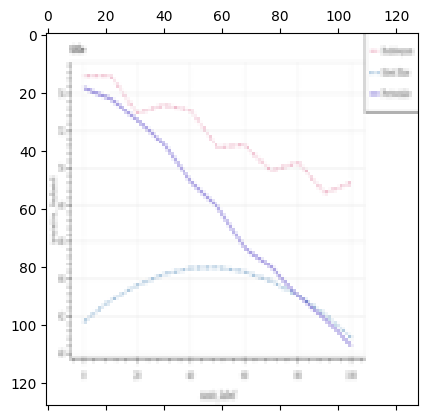

In [41]:
print(chart_types[y_test[28]])
plt.matshow(x_test[28])

In [36]:
y_predicted = cnn_model.predict(x_test)


7/7 [==============================] - 2s 240ms/step


In [39]:
y_predicted_values=[]
for i in y_predicted:
  y_predicted_values.append(np.argmax(i))
y_predicted_values

[0,
 4,
 0,
 0,
 2,
 0,
 3,
 3,
 3,
 4,
 0,
 4,
 2,
 3,
 0,
 3,
 4,
 0,
 1,
 4,
 2,
 1,
 1,
 1,
 4,
 3,
 2,
 3,
 0,
 2,
 2,
 0,
 0,
 1,
 3,
 3,
 0,
 2,
 1,
 2,
 1,
 4,
 4,
 4,
 3,
 2,
 3,
 0,
 4,
 1,
 4,
 2,
 3,
 1,
 0,
 4,
 3,
 2,
 4,
 3,
 3,
 0,
 0,
 4,
 3,
 1,
 4,
 1,
 1,
 0,
 4,
 1,
 0,
 1,
 4,
 2,
 1,
 2,
 4,
 0,
 3,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 3,
 3,
 4,
 2,
 2,
 0,
 1,
 4,
 4,
 2,
 0,
 3,
 3,
 4,
 1,
 3,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 3,
 2,
 4,
 3,
 3,
 4,
 1,
 1,
 1,
 1,
 4,
 0,
 2,
 3,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 3,
 4,
 4,
 1,
 1,
 2,
 1,
 2,
 3,
 2,
 3,
 1,
 3,
 0,
 0,
 1,
 1,
 4,
 3,
 2,
 1,
 3,
 1,
 0,
 4,
 4,
 0,
 0,
 4,
 3,
 0,
 3,
 1,
 1,
 2,
 0,
 1,
 3,
 0,
 2,
 4,
 3,
 4,
 2,
 2,
 1,
 2,
 4,
 4,
 4,
 3,
 1,
 2,
 1,
 1,
 3,
 2,
 0,
 3,
 3,
 2,
 3,
 0,
 2,
 2,
 3,
 3,
 0,
 3,
 1,
 0,
 0,
 4,
 1,
 3,
 4,
 2]

hbar_categorical


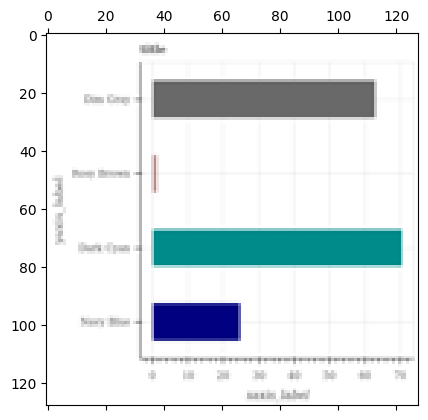

In [43]:
print(chart_types[y_predicted_values[26]])
plt.matshow(x_test[26])

In [44]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_values)
confusion_matrix

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[34,  6,  0,  0,  0],
       [ 1, 35,  0,  0,  0],
       [ 1,  0, 36,  2,  0],
       [ 0,  3,  6, 47,  4],
       [ 0,  0,  0,  1, 34]], dtype=int32)>

In [45]:
print(classification_report(y_test,y_predicted_values))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        40
           1       0.80      0.97      0.88        36
           2       0.86      0.92      0.89        39
           3       0.94      0.78      0.85        60
           4       0.89      0.97      0.93        35

    accuracy                           0.89       210
   macro avg       0.89      0.90      0.89       210
weighted avg       0.89      0.89      0.88       210

